# pagerank&textrank
---------
- 키워드추출: 문서를 토큰화한 단어의 랭킹을 구해 높은순으로 추출
- 요약: 중요도가 높은 단어의 랭킹순으로 나열
- 그래프 기반의 순위 알고리즘은 그래프 전체의 재귀 고려(내재 정보도 활용해 문장의 중요도 계산)
- 노드가 단어가 되고, 엣지가 중요도가 됨
- 페이지랭크는 엣지에 화살표가 있고, 텍스트랭크는 화살표가 없음(유연한 사용 가능)
- 텍스트랭크 그래프 생성하기: 필요없는 품사는 노드로 만들지 않음


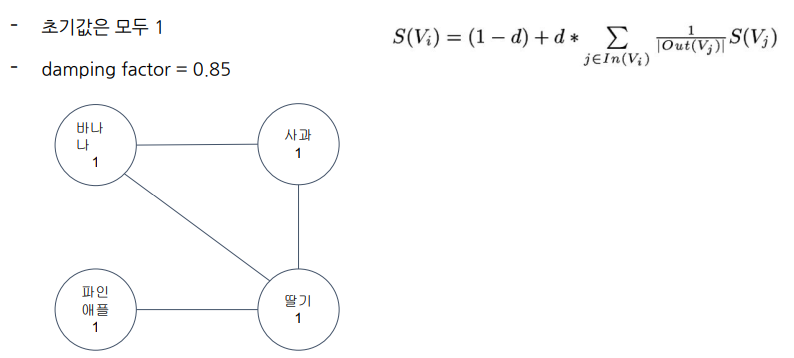

# 실습

In [1]:
text='''백신이 나오더라도 현재의 팬더믹(감염병 대유행) 상황은 쉽사리 종결되지 않을 것으로 봤다.

오명돈 중앙임상위원회 위원장은 25일 국립중앙의료원에서 열린 '코로나19 공동대응상황실·신종감염병 중앙임상위원회' 기자회견에서 "코로나19 재확산은 충분히 예상돼왔던 상황"이라며 이같이 밝혔다.

 그러면서 세계보건기구(WHO)의 발언을 인용해 "록다운(봉쇄)을 통해 유행을 억제하고, 의료시스템의 부하를 감소시킬 수는 있지만, 장기적 해결책은 아니다"고 했다.

그는 "사회적 거리두기 3단계가 불필요하다는 의미냐"는 질문에는 "중앙임상위는 코로나19 방역이 아닌 임상기관인만큼 방역단계를 언급하는 건 부적절하다"며 말을 아꼈다.

그러면서도 "방역 단계가 올라가면 사회경제적 영향이 매우 광범위해지기 때문에, 최종 방역 단계 결정은 사회적 합의가 필요한 사안"이라고 답했다.

코로나19 백신에 대해서는 의료계도 기대가 크지만, 회의적인 시각도 적지 않다고 전했다.

오 위원장은 "안전하고 효과적인 백신이 나오리라는 보장이 없다"며 "설령 나오더라도 그것만 가지고는 이 팬데믹을 종식 못 할 것"이라고 말했다.

그는 바이러스 침투 부위가 신체 외부에 위치한 호흡기질환 특성상 다른 질환에 비해 완벽한 백신이 나오기를 기대하기는 힘들다고 말했다.

예컨대 백신 접종 후 예방률이 90%에 달하는 간염은 백신을 맞으면 체내 항체나 면역세포가 만들어진 뒤 간세포로 이동해 바이러스를 찾아내고 죽인다. 그러나 코로나19가 침투하는 호흡기 중 상기도를 이루는 기도 점막, 비강(코) 등은 우리 몸 밖에 있다. 면역세포나 항체를 포함한 세포는 신체 밖으로 나올 수 없기 때문에, 백신으로 항체가 만들어져도 호흡기질환을 막는 데는 한계가 있다는 설명이다.

 그는 "미국 식품의약국(FDA)은 코로나19 백신 허가 기준을 질병 예방효과 50% 정도로 제시한다"며 "우리도 학수고대하고 있지만 100% 확산을 예방하고 사망률을 줄이는 백신은 기대하기 어려운 상황"이라고 말했다.'''

In [3]:
from gensim.summarization import keywords
print(keywords(text,words=10).split('\n'))

['코로나', '백신이', '중앙임상위원회', '사회적', '단계가', '있지만', '면역세포가', '있다는', '정도로', '방역단계를']


In [4]:
from gensim.summarization.summarizer import summarize
print(summarize(text))

오 위원장은 "안전하고 효과적인 백신이 나오리라는 보장이 없다"며 "설령 나오더라도 그것만 가지고는 이 팬데믹을 종식 못 할 것"이라고 말했다.
그는 "미국 식품의약국(FDA)은 코로나19 백신 허가 기준을 질병 예방효과 50% 정도로 제시한다"며 "우리도 학수고대하고 있지만 100% 확산을 예방하고 사망률을 줄이는 백신은 기대하기 어려운 상황"이라고 말했다.


## 문재인 박근혜 연설문

### 박근혜

In [10]:
import requests
import re
from bs4 import BeautifulSoup

In [14]:
url='https://ko.wikisource.org/wiki/%EC%83%88%EB%88%84%EB%A6%AC%EB%8B%B9_%EB%B0%95%EA%B7%BC%ED%98%9C_%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD_%EC%A0%9C18%EB%8C%80_%EB%8C%80%ED%86%B5%EB%A0%B9_%EC%84%A0%EA%B1%B0_%EC%B6%9C%EB%A7%88_%EC%84%A0%EC%96%B8%EB%AC%B8'
resp=requests.get(url)
soup=BeautifulSoup(resp.text,'html.parser')
text=soup.find('div',class_='mw-parser-output').find('div',style='width: 500px; margin:auto; text-align:justify;')

In [38]:
import requests
from bs4 import BeautifulSoup

res=requests.get('https://ko.wikisource.org/wiki/%EC%83%88%EB%88%84%EB%A6%AC%EB%8B%B9_%EB%B0%95%EA%B7%BC%ED%98%9C_%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD_%EC%A0%9C18%EB%8C%80_%EB%8C%80%ED%86%B5%EB%A0%B9_%EC%84%A0%EA%B1%B0_%EC%B6%9C%EB%A7%88_%EC%84%A0%EC%96%B8%EB%AC%B8')

soup=BeautifulSoup(res.content,'html.parser')

p_data=soup.find('div','mw-parser-output')
txt=p_data.get_text()
#print(txt)

In [39]:
txt

'\n\n\n\n\n\n새누리당 박근혜 대한민국 제18대 대통령 선거 출마 선언문저자: 박근혜\n\n\n\n\n\n\n\n\n\n2012년 7월 10일, 제18대 대통령 선거 새누리당 경선에 출마한다고 선언한 것\n\n\n\n\n\n\n\n\n\n\n\n\n이 저작물은 공개적으로 행한 정치적 연설이나 공개적으로 법정, 국회, 지방의회에서 행한 진술이므로 대한민국 저작권법 제24조에 의해 어떠한 방법으로든지 이용할 수 있습니다. 다만, 동일한 저작자의 연설이나 진술을 편집하여 이용하는 경우에는 해당 조항이 적용되지 않습니다.\n\n\n\n\xa0\n\n\n\n\nPublic domainPublic domainfalsefalse\n\n\n\n존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대한민국을 만들기 위해, 저의 모든 것을 바치겠다는 각오로 이 자리에 섰습니다. 저 박근혜, 이번 18대 대통령선거 출마를 선언합니다.\n국민 여러분! 저의 삶은 대한민국과 함께 해온 시간이었습니다. 우리나라가 가난을 이기고, 꿈을 이뤄가는 위대한 과정을 어린 시절부터 가슴깊이 새겨왔습니다. \n어머니가 흉탄에 돌아가신 후, 견딜 수 없는 고통과 어려움 속에서도 그 힘든 시간을 이겨낼 수 있었던 것은, 어머니의 빈자리에 대한 책임감과 사명감 때문이었습니다. 그리고 늘 함께 해주시고 힘이 되어 주셨던 국민 여러분이 계셨기 때문이었습니다. 제가 그 막중한 일을 해내고, 고통을 이겨내고 다시 일어설 수 있었던 것은 모두 국민 여러분이 계셨기 때문이었습니다. \n그때부터 제 삶은 완전히 다른 길을 가야했습니다. 개인의 삶 대신, 국민과 함께 하는 공적인 삶이 시작되었습니다. 각계각층의 국민들을 만나고, 국민의 애환 속으로 들어가게 되면서 저에게는 국민이 곧 어머니였고, 가족이었습니다. 국민들의 삶과 애환을 듣고, 해결하고자 노력하는 것이 제 삶에서 가장 큰 가치였습니다. \n아버지를 잃는 또 다른 고통과 아픔을 겪고, 저는 평범한 삶을 살고자 했습니다. 

In [18]:
from gensim.summarization import keywords
print(keywords(txt,words=10).split('\n'))

['있습니다', '새로운', '국민들의', '것입니다', '아니라', '합니다', '박근혜', '중요한', '만들고', '국민행복의']


In [19]:
from gensim.summarization.summarizer import summarize
print(summarize(txt))

저 박근혜, 그 동안의 제 삶이 저 혼자만의 삶이 아니라 국민 여러분의 신뢰와 성원 덕분이었다는 것을 결코 잊을 수 없습니다.
그리고 그 은혜에 보답하는 길은, 이제 국민 여러분의 아픔을 같이 나누고, 함께 해결하면서 국민 모두가 각자의 꿈을 이룰 수 있는 대한민국을 만드는 길에 저의 모든 것을 바치는 것이라 생각합니다.
새로운 대한민국을 만드는 그 길을, 저와 함께 가 주십시오.
국민 여러분, 우리는 지금 중요한 기로에 서 있습니다.
그런 위기 상황에서, 우리는 새로운 정부 구성을 앞두고 있습니다.
18대 대통령이 이끌어갈 향후 5년 동안 이러한 대내외의 도전에 어떻게 응전하느냐에 따라, 대한민국의 미래와 국민 여러분의 삶이 결정될 것입니다.
정치가 국민을 안심시키기는커녕, 오히려 안보까지 걱정하게 만들고 있습니다.
그동안 정권이 여러 번 교체되었지만, 국민들의 불안은 나아지지 않았습니다.
개인의 창의력이 중요한 지식기반사회에서는 국민 한 사람, 한 사람이 중요한 시대이고, 국민 개개인이 행복해지고 자신의 잠재력과 끼를 최대한 발휘할 수 있어야만 국가가 발전할 수 있습니다.
이제 국정운영의 패러다임을 국가에서 국민으로, 개인의 삶과 행복 중심으로 확 바꿔야 합니다.
국민 개개인의 꿈을 향한 노력이 국가를 발전시키고 국가 발전이 국민 행복으로 선순환되는 ‘국민행복의 길’, 이 길이 저 박근혜가 가고자하는 새로운 국가발전의 길입니다.!
정당한 기업활동은 최대한 보장하고 불필요한 규제는 철폐하여 경제에 활력을 불어넣겠지만, 영향력이 큰 기업일수록 사회적 책임을 다할 수 있도록 하는데는 과감하고 단호하게 법을 집행하는 정부를 만들겠습니다.
국민행복의 길을 열어갈 두 번째 과제로, 저는 좋은 일자리 창출을 통해 일하고 싶은 사람들이 꿈을 이룰 수 있도록 하겠습니다.
저는 국민행복을 위해 ‘경제민주화-일자리-복지’를 아우르는 (가칭)‘오천만 국민행복 플랜’을 수립하여 추진하겠습니다.
존경하는 국민여러분, 이러한 3대 핵심과제의 핵심은 바로 사람에 있습니다.
저는 지속가

In [33]:
from konlpy.tag import Okt
okt=Okt()
nouns=okt.nouns(txt)
print(nouns)

['새누리당', '박근혜', '대한민국', '제', '대통령', '선거', '출마', '선언문', '저자', '박근혜', '제', '대통령', '선거', '새누리당', '경선', '출마', '선언', '것', '이', '저작물', '공개', '행', '정치', '연설', '공개', '법정', '국회', '지방의회', '행', '진술', '므', '대한민국', '저작권법', '제', '방법', '이용', '수', '다만', '저작자', '연설', '진술', '편집', '이용', '경우', '해당', '조항', '적용', '존경', '국민', '여러분', '저', '오늘', '국민', '분', '분', '꿈', '대한민국', '만들기', '위해', '저', '모든', '것', '각오', '이', '자리', '저', '박근혜', '이번', '대통령선거', '출마', '선언', '국민', '여러분', '저', '대한민국', '시간', '우리나라', '가난', '이기', '꿈', '과정', '시절', '가슴', '깊이', '어머니', '흉탄', '후', '수', '고통', '어려움', '속', '그', '시간', '낼', '수', '것', '어머니', '빈자리', '대한', '책임감', '명감', '때문', '늘', '해주시', '힘', '국민', '여러분', '때문', '제', '그', '막중', '일', '고통', '다시', '수', '것', '모두', '국민', '여러분', '때문', '그때', '제', '다른', '길', '가야', '개인', '삶', '대신', '국민', '공적', '삶', '시작', '각계', '각층', '국민', '국민', '애환', '속', '저', '국민', '곧', '어머니', '가족', '국민', '삶', '애환', '해결', '노력', '것', '제', '삶', '가장', '아버지', '또', '다른', '고통', '아픔', '저', '삶', '국민', '땀', '눈물', '이', '해', '온', '나라', '외환위기', '국민'

In [34]:
words=[]
for n in nouns:
    if len(n)>1:
        words.append(n)
print(words)

['새누리당', '박근혜', '대한민국', '대통령', '선거', '출마', '선언문', '저자', '박근혜', '대통령', '선거', '새누리당', '경선', '출마', '선언', '저작물', '공개', '정치', '연설', '공개', '법정', '국회', '지방의회', '진술', '대한민국', '저작권법', '방법', '이용', '다만', '저작자', '연설', '진술', '편집', '이용', '경우', '해당', '조항', '적용', '존경', '국민', '여러분', '오늘', '국민', '대한민국', '만들기', '위해', '모든', '각오', '자리', '박근혜', '이번', '대통령선거', '출마', '선언', '국민', '여러분', '대한민국', '시간', '우리나라', '가난', '이기', '과정', '시절', '가슴', '깊이', '어머니', '흉탄', '고통', '어려움', '시간', '어머니', '빈자리', '대한', '책임감', '명감', '때문', '해주시', '국민', '여러분', '때문', '막중', '고통', '다시', '모두', '국민', '여러분', '때문', '그때', '다른', '가야', '개인', '대신', '국민', '공적', '시작', '각계', '각층', '국민', '국민', '애환', '국민', '어머니', '가족', '국민', '애환', '해결', '노력', '가장', '아버지', '다른', '고통', '아픔', '국민', '눈물', '나라', '외환위기', '국민', '고통', '모습', '보고', '수만', '고통', '치유', '조금', '보태', '위해', '정치', '시작', '오히려', '국민', '여러분', '존폐', '위기', '국민', '불신', '원성', '국민', '여러분', '신뢰', '테러', '목숨', '국민', '여러분', '기적', '다시', '박근혜', '동안', '혼자', '국민', '여러분', '신뢰', '성원', '덕분', '결코', '은혜', '보답', '이제', '국민', '

In [35]:
from collections import Counter
count=Counter(words)
#print(count)

wdic=dict(count.most_common())
wdic

{'국민': 74,
 '여러분': 22,
 '행복': 20,
 '정부': 18,
 '박근혜': 13,
 '국가': 12,
 '신뢰': 11,
 '우리': 10,
 '사람': 10,
 '대한민국': 9,
 '일자리': 9,
 '교육': 9,
 '발전': 8,
 '사회': 8,
 '정책': 8,
 '대통령': 7,
 '복지': 7,
 '위해': 6,
 '경제': 6,
 '과제': 6,
 '통해': 6,
 '새누리당': 5,
 '출마': 5,
 '공개': 5,
 '정치': 5,
 '모든': 5,
 '고통': 5,
 '대한': 5,
 '노력': 5,
 '지금': 5,
 '성장': 5,
 '운영': 5,
 '핵심': 5,
 '실천': 5,
 '공유': 5,
 '정보': 5,
 '선거': 4,
 '때문': 4,
 '다시': 4,
 '시작': 4,
 '안보': 4,
 '국정': 4,
 '지식': 4,
 '시대': 4,
 '경제민주화': 4,
 '기업': 4,
 '산업': 4,
 '지속': 4,
 '지원': 4,
 '한반도': 4,
 '약속': 4,
 '선언': 3,
 '존경': 3,
 '과정': 3,
 '어머니': 3,
 '모두': 3,
 '개인': 3,
 '해결': 3,
 '가장': 3,
 '나라': 3,
 '위기': 3,
 '기적': 3,
 '동안': 3,
 '이제': 3,
 '변화': 3,
 '반드시': 3,
 '격차': 3,
 '부담': 3,
 '미래': 3,
 '문제': 3,
 '어디': 3,
 '그동안': 3,
 '개개인': 3,
 '실현': 3,
 '확립': 3,
 '효율': 3,
 '적극': 3,
 '마련': 3,
 '추진': 3,
 '마음': 3,
 '씨앗': 3,
 '선언문': 2,
 '저자': 2,
 '경선': 2,
 '연설': 2,
 '진술': 2,
 '이용': 2,
 '시간': 2,
 '우리나라': 2,
 '어려움': 2,
 '다른': 2,
 '애환': 2,
 '아픔': 2,
 '오히려': 2,
 '불신': 2,
 '생각': 2,
 '세계': 2,


In [34]:
pip install wordcloud

  Using cached Pillow-7.2.0-cp37-cp37m-win_amd64.whl (2.1 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp37-none-win_amd64.whl (57 kB)
Note: you may need to restart the kernel to use updated packages.


In [36]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

%matplotlib inline

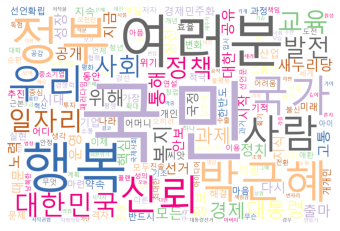

In [37]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(wdic) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()


### 문재인

In [20]:
res=requests.get('https://ko.wikisource.org/wiki/%EB%AC%B8%EC%9E%AC%EC%9D%B8_%EC%B6%9C%EB%A7%88%EC%84%A0%EC%96%B8%EB%AC%B8')

soup=BeautifulSoup(res.content,'html.parser')

p_data1=soup.find('div','mw-parser-output')
txt1=p_data1.get_text()

print(txt1)







문재인 출마선언문저자: 문재인









 이 문서의 서지 정보 문재인이 18대 대선에 출마하며 밝힌 선언이다.












이 저작물은 공개적으로 행한 정치적 연설이나 공개적으로 법정, 국회, 지방의회에서 행한 진술이므로 대한민국 저작권법 제24조에 의해 어떠한 방법으로든지 이용할 수 있습니다. 다만, 동일한 저작자의 연설이나 진술을 편집하여 이용하는 경우에는 해당 조항이 적용되지 않습니다.



 




Public domainPublic domainfalsefalse



정권교체 하겠습니다!
정치교체 하겠습니다!
시대교체 하겠습니다!

‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.
그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치로 불러냈습니다. 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다. 이제 저는 국민과 함께 높이 날고 크게 울겠습니다.
오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.

‘우리나라 대통령’이 되겠습니다.
 
존경하는 국민 여러분!
저는 대통령이 되겠습니다. 우리나라 대통령이 되겠습니다.
소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.
지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다. 나라의 주인으로 행세하지 못했고, 주인으로 대접받지 못했습니다. 나서서 말도 하지 못했습니다. 이제 몸을 일으켜 날아야 합니다. 당당하게 말하고 정치에 참여해야 합니다.
제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다. 저는 시민과 동행하는 정치를 하고 싶습니다.
제가 추구하는 ‘우리나라’는 특권과 불평등의 나라가 아니라, 보통

In [81]:
txt1

'\n\n\n\n\n\n문재인 출마선언문저자: 문재인\n\n\n\n\n\n\n\n\n\n\xa0이 문서의 서지 정보 문재인이 18대 대선에 출마하며 밝힌 선언이다.\n\n\n\n\n\n\n\n\n\n\n\n\n이 저작물은 공개적으로 행한 정치적 연설이나 공개적으로 법정, 국회, 지방의회에서 행한 진술이므로 대한민국 저작권법 제24조에 의해 어떠한 방법으로든지 이용할 수 있습니다. 다만, 동일한 저작자의 연설이나 진술을 편집하여 이용하는 경우에는 해당 조항이 적용되지 않습니다.\n\n\n\n\xa0\n\n\n\n\nPublic domainPublic domainfalsefalse\n\n\n\n정권교체 하겠습니다!\n정치교체 하겠습니다!\n시대교체 하겠습니다!\n\n‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.\n그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치로 불러냈습니다. 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다. 이제 저는 국민과 함께 높이 날고 크게 울겠습니다.\n오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.\n\n‘우리나라 대통령’이 되겠습니다.\n \n존경하는 국민 여러분!\n저는 대통령이 되겠습니다. 우리나라 대통령이 되겠습니다.\n소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.\n지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다. 나라의 주인으로 행세하지 못했고, 주인으로 대접받지 못했습니다. 나서서 말도 하지 못했습니다. 이제 몸을 일으켜 날아야 합니다. 당당하게 말하고 정치에 참여해야 합니다.\n제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다

In [21]:
from gensim.summarization import keywords
print(keywords(txt1,words=10).split('\n'))

['합니다', '만들겠습니다', '있습니다', '국민의', '새로운', '그리고', '나라가', '일자리', '그러나', '대통령의']


In [22]:
from gensim.summarization.summarizer import summarize
print(summarize(txt1))

이 저작물은 공개적으로 행한 정치적 연설이나 공개적으로 법정, 국회, 지방의회에서 행한 진술이므로 대한민국 저작권법 제24조에 의해 어떠한 방법으로든지 이용할 수 있습니다.
우리나라 대통령이 되겠습니다.
소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.
제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다.
제가 추구하는 ‘우리나라’는 특권과 불평등의 나라가 아니라, 보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다.
입시부담과 성적스트레스 그리고 학교폭력에 상처받은 어린 영혼들은 그 아픔을 견디지 못하고 하나 둘 우리 곁을 떠나고 있습니다.
시민의 한숨과 눈물을 닦아주지 못하는 정치가 있었고, 오히려 국민의 걱정거리가 된 초라한 정부의 모습도 있었습니다.
상식이 통하는 사회, 권한과 책임이 비례하는 사회, 다름을 인정하는 세상, 개천에서 용이 날 수 있는 사회, 철학이 있는 나라, 약자의 얘기에 귀를 기울이고, 어려운 사람에게 진심어린 위로를 건네는 세상, 세금이 제대로 쓰이는 나라, 힘없는 사람에게 관대하고 힘 있는 사람에게 엄격한 잣대가 적용되는 사회, 국민들이 기대고 의지할 수 있도록 어깨를 내어주는 대통령, 국민에게 부끄럽지 않은 정부를 만들어 달라는 것이 국민의 요구였습니다.
그러나 거창하게만 들리는 이 국가비전 역시 국민의 마음속에 있었습니다.
국민의 뜻에서 대통령의 길을 찾겠습니다.
새로운 대한민국을 만들겠습니다.
지금 우리는 ‘거대한 전환’의 시기를 맞고 있습니다.
일부에서는 기존 자본주의 모델의 수명이 다했다는 진단을 내놓기도 합니다.
무엇보다도 우리는 개발독재 모델의 유산을 청산해야 합니다.
개방, 공유, 협동, 공생의 새로운 원리를 채택해 인간이 인간답게 살 수 있는 민주적이고 공정한 시장경제 모델을 만들어야 합니다.
그것이 

In [23]:
from konlpy.tag import Okt
okt=Okt()
nouns1=okt.nouns(txt1)
print(nouns1)

['문재인', '출마', '선언문', '저자', '문재인', '문서', '서지', '정보', '문재인', '대선', '출마', '선언', '이', '저작물', '공개', '행', '정치', '연설', '공개', '법정', '국회', '지방의회', '행', '진술', '므', '대한민국', '저작권법', '제', '방법', '이용', '수', '다만', '저작자', '연설', '진술', '편집', '이용', '경우', '해당', '조항', '적용', '정권', '교체', '정치', '교체', '시대', '교체', '불비', '불명', '고사', '남쪽', '언덕', '나뭇가지', '동안', '지도', '새', '그', '한번', '날', '하늘', '끝', '날', '한번', '울면', '천지', '뒤흔듭니', '그', '동안', '정치', '거리', '시대', '저', '정치', '더', '이상', '남쪽', '나뭇가지', '수', '이제', '저', '국민', '높이', '날', '크게', '오늘', '저', '제', '대통령선거', '출마', '국민', '앞', '선언', '우리나라', '대통령', '이', '존경', '국민', '여러분', '저', '대통령', '우리나라', '대통령', '소수', '특권', '층', '나라', '보통사람', '주인', '우리나라', '네', '편', '내', '편', '편', '우리나라', '우리', '말', '조금', '우리나라', '의', '대통령', '지금', '우리', '보통사람', '지도', '나라', '주인', '행세', '주인', '말', '이제', '몸', '말', '정치', '참여', '제', '추구', '우리나라', '정치인', '나라', '시민', '직접', '정치', '정책', '과정', '참여', '나라', '저', '시민', '동행', '정치', '제', '추구', '우리나라', '특권', '불평등', '나라', '보통사람', '기회', '정의', '나라', '이제', '권력', '돈', '집단'

In [24]:
#왜 문재인 연설에서만 kkma가 되는지?


from konlpy.tag import Kkma
kkma=Kkma()
nouns1=kkma.nouns(txt1)
print(nouns1)

['문', '문재인', '재인', '출마', '출마선언문저자', '선언문', '저자', '이', '문서', '서지', '정보', '18', '18대', '대', '대선', '선언', '저작물', '공개적', '정치적', '연설', '법정', '국회', '지방', '지방의회', '의회', '진술', '대한', '대한민국', '민국', '저작권법', '제', '제24조', '24', '조', '방법', '이용', '수', '동', '동일한', '일한', '저작자', '편집', '경우', '해당', '조항', '적용', '정권', '정권교체', '교체', '정치', '정치교체', '시대', '시대교체', '불비', '불비불명', '불명', '고사', '남쪽', '언덕', '나뭇가지', '3', '3년', '년', '동안', '날', '날지도', '지도', '새', '하늘', '끝', '한번', '천지', '거리', '암울', '저', '이상', '국민', '오늘', '대통령', '대통령선거', '선거', '앞', '우리', '우리나라', '나라', '존경', '분', '소수', '특권층', '보통', '보통사람', '사람', '주인', '편', '내', '우리', '말', '조금', '진정', '의', '지금', '우리', '행세', '나', '몸', '당', '참여', '추구', '정치인', '시민', '정책', '정책과정', '과정', '동행', '특권', '불평등', '기회', '공평', '정의', '이제', '권력', '돈', '집단', '그', '희생', '강요', '경제', '모두', '결심', '이유', '삶', '현실', '엄중', '때문', '근본적', '혁신', '거대', '전환', '사회', '경제성장', '성장', '과실', '부유층', '대기업', '창고', '황금', '대부분', '취업', '취업불안', '불안', '주거', '주거불안', '고용', '고용불안', '건강', '건강불안', '노후', '노후불안', '등', '이불', '잠',

In [25]:
words1=[]
for n in nouns1:
    if len(n)>1:
        words1.append(n)
print(words1)

['문재인', '재인', '출마', '출마선언문저자', '선언문', '저자', '문서', '서지', '정보', '18', '18대', '대선', '선언', '저작물', '공개적', '정치적', '연설', '법정', '국회', '지방', '지방의회', '의회', '진술', '대한', '대한민국', '민국', '저작권법', '제24조', '24', '방법', '이용', '동일한', '일한', '저작자', '편집', '경우', '해당', '조항', '적용', '정권', '정권교체', '교체', '정치', '정치교체', '시대', '시대교체', '불비', '불비불명', '불명', '고사', '남쪽', '언덕', '나뭇가지', '3년', '동안', '날지도', '지도', '하늘', '한번', '천지', '거리', '암울', '이상', '국민', '오늘', '대통령', '대통령선거', '선거', '우리', '우리나라', '나라', '존경', '소수', '특권층', '보통', '보통사람', '사람', '주인', '우리', '조금', '진정', '지금', '우리', '행세', '참여', '추구', '정치인', '시민', '정책', '정책과정', '과정', '동행', '특권', '불평등', '기회', '공평', '정의', '이제', '권력', '집단', '희생', '강요', '경제', '모두', '결심', '이유', '현실', '엄중', '때문', '근본적', '혁신', '거대', '전환', '사회', '경제성장', '성장', '과실', '부유층', '대기업', '창고', '황금', '대부분', '취업', '취업불안', '불안', '주거', '주거불안', '고용', '고용불안', '건강', '건강불안', '노후', '노후불안', '이불', '잠자리', '자리', '아이', '일자리', '입시', '입시부담', '부담', '성적', '성적스트레스', '스트레스', '학교', '학교폭력', '폭력', '영혼', '아픔', '하나', '어르신', '세상', '약자', '고통', '

In [26]:
from collections import Counter
count=Counter(words1)
#print(count)

wdic1=dict(count.most_common())
wdic1

{'우리': 3,
 '도종환': 2,
 '문재인': 1,
 '재인': 1,
 '출마': 1,
 '출마선언문저자': 1,
 '선언문': 1,
 '저자': 1,
 '문서': 1,
 '서지': 1,
 '정보': 1,
 '18': 1,
 '18대': 1,
 '대선': 1,
 '선언': 1,
 '저작물': 1,
 '공개적': 1,
 '정치적': 1,
 '연설': 1,
 '법정': 1,
 '국회': 1,
 '지방': 1,
 '지방의회': 1,
 '의회': 1,
 '진술': 1,
 '대한': 1,
 '대한민국': 1,
 '민국': 1,
 '저작권법': 1,
 '제24조': 1,
 '24': 1,
 '방법': 1,
 '이용': 1,
 '동일한': 1,
 '일한': 1,
 '저작자': 1,
 '편집': 1,
 '경우': 1,
 '해당': 1,
 '조항': 1,
 '적용': 1,
 '정권': 1,
 '정권교체': 1,
 '교체': 1,
 '정치': 1,
 '정치교체': 1,
 '시대': 1,
 '시대교체': 1,
 '불비': 1,
 '불비불명': 1,
 '불명': 1,
 '고사': 1,
 '남쪽': 1,
 '언덕': 1,
 '나뭇가지': 1,
 '3년': 1,
 '동안': 1,
 '날지도': 1,
 '지도': 1,
 '하늘': 1,
 '한번': 1,
 '천지': 1,
 '거리': 1,
 '암울': 1,
 '이상': 1,
 '국민': 1,
 '오늘': 1,
 '대통령': 1,
 '대통령선거': 1,
 '선거': 1,
 '우리나라': 1,
 '나라': 1,
 '존경': 1,
 '소수': 1,
 '특권층': 1,
 '보통': 1,
 '보통사람': 1,
 '사람': 1,
 '주인': 1,
 '조금': 1,
 '진정': 1,
 '지금': 1,
 '행세': 1,
 '참여': 1,
 '추구': 1,
 '정치인': 1,
 '시민': 1,
 '정책': 1,
 '정책과정': 1,
 '과정': 1,
 '동행': 1,
 '특권': 1,
 '불평등': 1,
 '기회': 1,
 '공평': 1,
 '정의

In [27]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

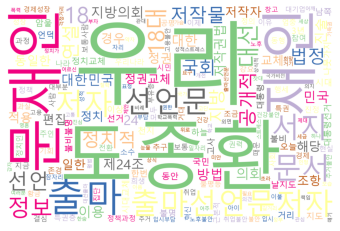

In [28]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(wdic1) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

# 감성분석
------
- 감정 감지
- 특성 기반 감정분석: 텍스트 내에서 특성을 기준으로 감정분석
- 감성분석의 필요성: 대량 데이터 처리 가능, 추출의 일관성, 실시간 분석 가능
- 베이즈
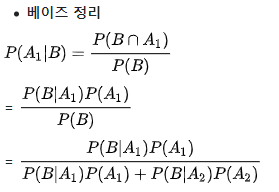
- 나이브베이즈: 특징들이 서로 확률적으로 독립이라는 가정 추가
- 새로운 입력 단어의 확률은 0. 다른 단어들과 조건부확률을 구하면 모든 확률값이 0. 모든 단어가 1번이상 등장한다고 가정해 분자에 1 더하고 분모에 모든 데이터 수 더함